# Aula 15 - Visualização de Dados

Nesta aula iremos aprender a plotar gráficos utilizando bibliotecas Python usando o dataset Titanic.

Além de olhar na documentação das bibliotecas para descobrir como realizar as visualizações desejadas, precisamos treinar nossa capacidade analítica para entender gráficos e saber propor as melhores visualizações.

**Objetivo da Análise:**

O objetivo desta análise é explorar o dataset Titanic para entender melhor os fatores que influenciaram a sobrevivência dos passageiros. Através de diferentes tipos de gráficos e técnicas de visualização, vamos identificar padrões e relações importantes, como a influência do gênero, idade, classe social e tarifas pagas na taxa de sobrevivência. Essa abordagem não apenas ajuda a desenvolver habilidades técnicas na criação de visualizações, mas também aprimora a interpretação de dados, permitindo uma análise crítica e fundamentada das informações apresentadas. Ao final, os alunos serão capazes de escolher e criar visualizações eficazes para comunicar insights a partir dos dados.


In [5]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Carregar o dataset Titanic diretamente do Seaborn
titanic_data = sns.load_dataset('titanic')

In [7]:
# Exibir as primeiras linhas do dataset para entender sua estrutura
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
# Exibir informações básicas sobre o dataset
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Distribuição de Sobreviventes:

Primeiro, vamos visualizar a distribuição dos sobreviventes para entender a proporção entre aqueles que sobreviveram e aqueles que não sobreviveram:

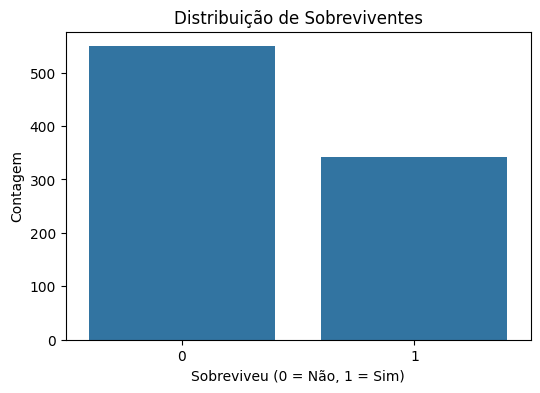

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=titanic_data)
plt.title('Distribuição de Sobreviventes')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()

**Interpretação**: Este gráfico de barras nos mostra a contagem absoluta de passageiros que sobreviveram versus aqueles que não sobreviveram. Uma visualização inicial como essa é essencial para entender o desbalanceamento dos dados, o que pode ser crucial ao construir modelos preditivos.

## Distribuição de Idade dos Passageiros:

Analisar a distribuição da idade pode revelar insights sobre a demografia dos passageiros e como ela se relaciona com a sobrevivência:

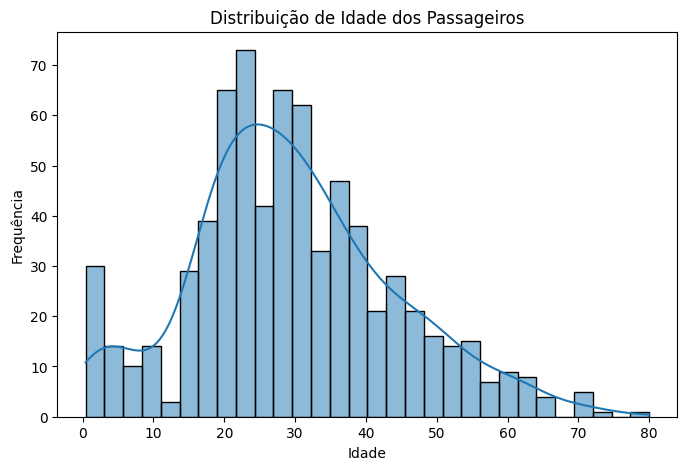

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(titanic_data['age'].dropna(), bins=30, kde=True)
plt.title('Distribuição de Idade dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


**Interpretação**: O histograma com uma linha de densidade (KDE) ajuda a visualizar a distribuição de idades, identificando a presença de picos, como crianças pequenas e adultos em idade média. Análises adicionais poderiam investigar se certas faixas etárias tinham uma maior probabilidade de sobrevivência.

## Sobrevivência por Gênero:

Vamos explorar como o gênero influenciou a taxa de sobrevivência:

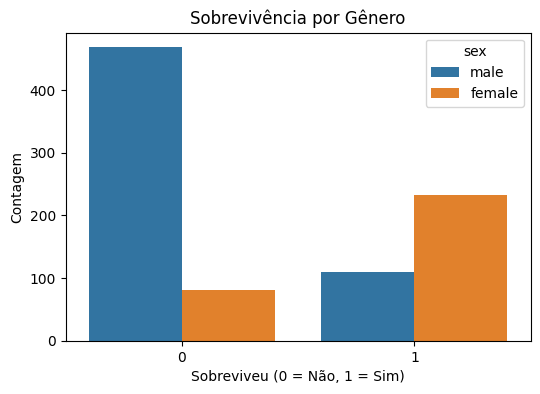

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', hue='sex', data=titanic_data)
plt.title('Sobrevivência por Gênero')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()


**Interpretação**: Este gráfico de barras empilhadas destaca a diferença significativa nas taxas de sobrevivência entre homens e mulheres. No Titanic, havia uma regra de “mulheres e crianças primeiro” para os botes salva-vidas, o que explica a maior taxa de sobrevivência para mulheres. Esse insight é importante ao considerar variáveis de gênero em análises preditivas.

## Classe de Passageiros e Taxa de Sobrevivência:

Explorar a relação entre a classe social dos passageiros (1ª, 2ª, 3ª classe) e suas taxas de sobrevivência:

/tmp/ipython-input-3546462108.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=titanic_data, ci=None)


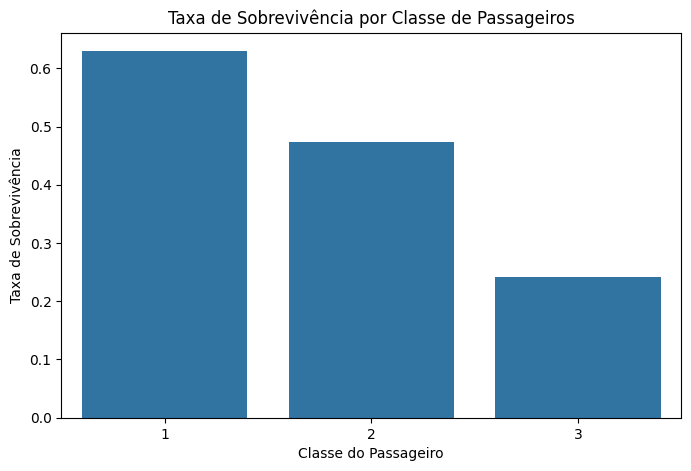

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(x='pclass', y='survived', data=titanic_data, ci=None)
plt.title('Taxa de Sobrevivência por Classe de Passageiros')
plt.xlabel('Classe do Passageiro')
plt.ylabel('Taxa de Sobrevivência')
plt.show()


**Interpretação**: Este gráfico de barras mostra que passageiros da 1ª classe tinham uma maior taxa de sobrevivência comparado com aqueles da 2ª e 3ª classe. Esse padrão provavelmente reflete o acesso mais rápido e fácil aos botes salva-vidas para passageiros em classes mais altas. Isso pode indicar que a classe social era um fator crítico na probabilidade de sobrevivência.

## Gráfico de Dispersão entre Idade e Tarifa:

A relação entre a idade dos passageiros e a tarifa paga, colorida pela sobrevivência, pode revelar tendências interessantes:

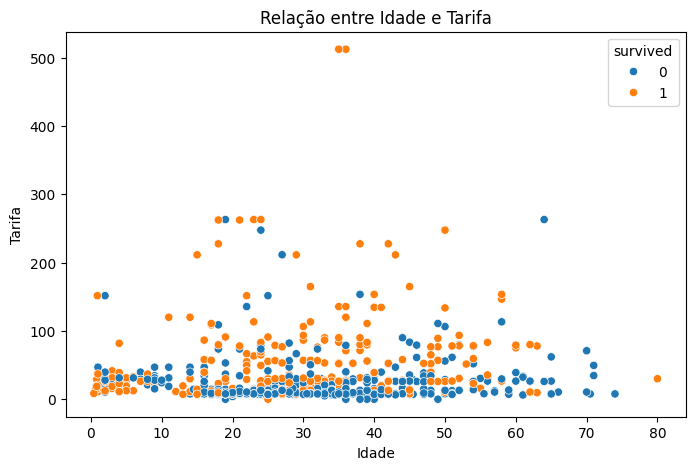

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='fare', hue='survived', data=titanic_data)
plt.title('Relação entre Idade e Tarifa')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.show()


**Interpretação**: Este gráfico de dispersão permite observar se há uma correlação entre a tarifa paga e a probabilidade de sobrevivência. Notamos que passageiros que pagaram tarifas mais altas (provavelmente da 1ª classe) tinham uma maior chance de sobrevivência, sugerindo uma correlação entre status econômico e sobrevivência. Outliers como tarifas muito altas e baixas podem indicar a presença de passageiros em cabines de luxo ou tarifas subsidiadas.


---
## Exercício: Explorando o Dataset Titanic com Visualizações de Dados

Objetivo: Analisar o dataset Titanic para identificar padrões e relações entre diferentes variáveis, utilizando técnicas de visualização de dados. Este exercício ajudará a entender como diferentes fatores podem ter influenciado a sobrevivência dos passageiros.

- Distribuição de Passageiros por Classe: Crie um gráfico de barras para mostrar a distribuição de passageiros entre as três classes (pclass). Quais classes tinham mais passageiros?

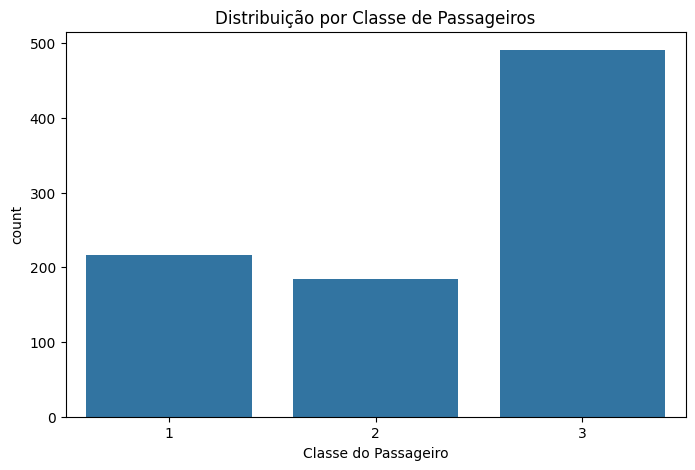

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='pclass', data=titanic_data)
plt.title('Distribuição por Classe de Passageiros')
plt.xlabel('Classe do Passageiro')
plt.show()

- Taxa de Sobrevivência por Gênero: Crie um gráfico de barras que mostre a taxa de sobrevivência (survived) separada por gênero (sex). Qual gênero teve a maior taxa de sobrevivência?

/tmp/ipython-input-3895844849.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='survived', data=titanic_data, ci=None)


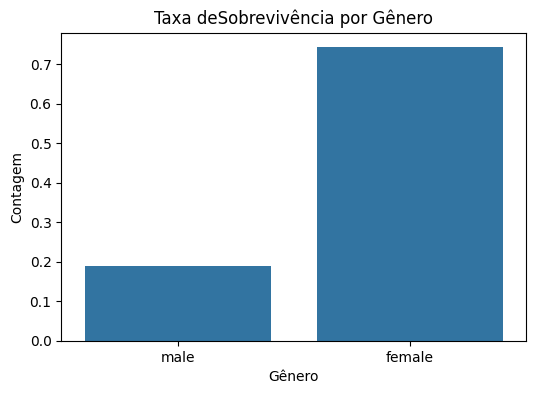

In [22]:
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='survived', data=titanic_data, ci=None)
plt.title('Taxa deSobrevivência por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

- Distribuição de Idade com base na Sobrevivência: Crie um gráfico de densidade (KDE) para mostrar a distribuição da idade (age) dos passageiros que sobreviveram e dos que não sobreviveram. Você observa algum padrão em relação à idade e a sobrevivência?

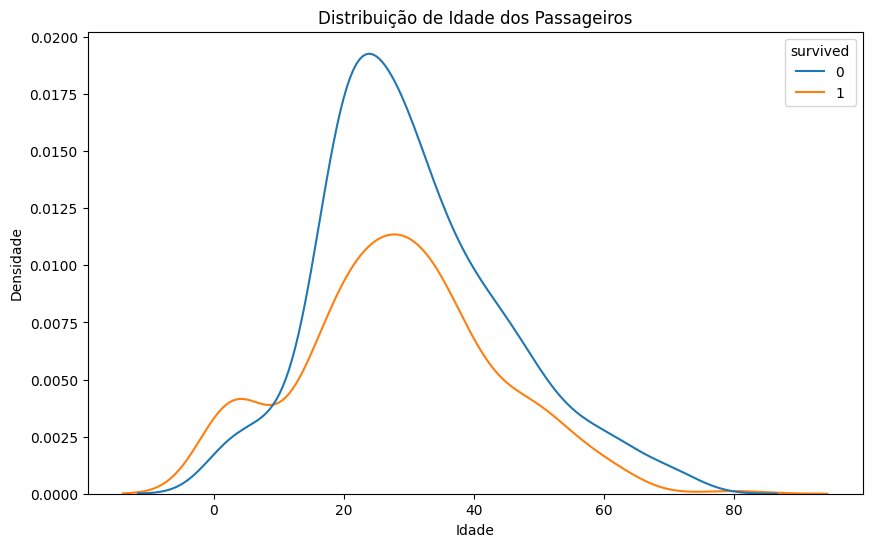

In [40]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=titanic_data, x='age', hue='survived')
plt.title('Distribuição de Idade dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.show()

- Relação entre Tarifa e Sobrevivência: Utilize um gráfico de dispersão para explorar a relação entre a tarifa paga (fare) e a sobrevivência. Os passageiros que pagaram tarifas mais altas tiveram maior chance de sobrevivência?

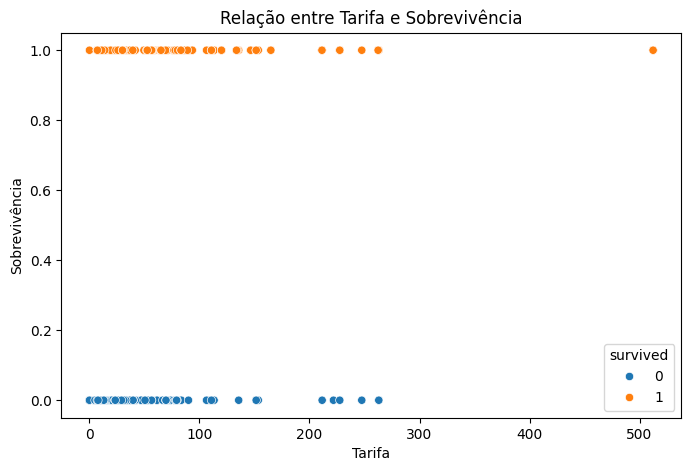

In [45]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='fare', y='survived', hue='survived', data=titanic_data)
plt.title('Relação entre Tarifa e Sobrevivência')
plt.xlabel('Tarifa')
plt.ylabel('Sobrevivência')
plt.show()

Questões para Reflexão:

- Quais insights você conseguiu extrair sobre a sobrevivência dos passageiros?
- Que tipo de correlação você observou entre a classe do passageiro e a taxa de sobrevivência?
- Como o gênero afetou a taxa de sobrevivência? Houve diferenças notáveis?
- Você notou alguma relação entre a idade dos passageiros e a probabilidade de sobrevivência?
- Que outras visualizações poderiam ser úteis para explorar mais profundamente os dados?

---

Desafio Extra (Opcional):

- Crie uma visualização que mostre a sobrevivência dos passageiros em função de mais de uma variável ao mesmo tempo. Por exemplo, você pode usar um gráfico de barras empilhadas para mostrar a sobrevivência em função da classe e do gênero, ou um gráfico de violino para explorar a distribuição de idade por classe e sobrevivência.

In [62]:

plt.figure(figsize=(8, 5))
sns.countplot(x='sex', y='')
plt.title('Taxa de Sobrevivência em Função da Classe e Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 800x500 with 0 Axes>

---

## Dataset Tips

Descrição: Este dataset contém informações sobre gorjetas em um restaurante, incluindo:

- valor total da conta
- o valor da gorjeta
- o gênero do cliente
- se havia fumantes na mesa
- o dia da semana
- hora do dia.

Objetivos da Análise do Dataset Tips

- Explorar a Relação entre o Valor da Conta e a Gorjeta:
    * Como o valor total da conta influencia o valor da gorjeta?
    * Existe uma relação linear entre o valor da conta e a gorjeta?

- Analisar a Influência de Variáveis Categóricas:
    * Como o sexo do cliente, se havia fumantes na mesa, o dia da semana, e o horário (almoço ou jantar) afetam o valor da gorjeta?
    * Essas variáveis influenciam a porcentagem da gorjeta em relação ao total da conta?

- Identificar Padrões Sazonais e Comportamentais:
    * Existem dias da semana em que os clientes tendem a dar gorjetas maiores?
    * O valor da gorjeta é maior no jantar comparado ao almoço?

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset Tips
tips_data = sns.load_dataset('tips')

# Exibir as primeiras linhas do dataset
print(tips_data.head())

# Exibir informações sobre o dataset
print(tips_data.info())


## Visualização Básica da Relação entre Total da Conta e Gorjeta:

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tips_data, x='total_bill', y='tip')
plt.title('Relação entre Total da Conta e Gorjeta')
plt.xlabel('Total da Conta (USD)')
plt.ylabel('Gorjeta (USD)')
plt.show()


Interpretação: Um gráfico de dispersão simples para visualizar a relação entre o total da conta e o valor da gorjeta. Este gráfico ajuda a entender se há uma correlação direta entre essas duas variáveis.

Análise da Proporção da Gorjeta em Relação ao Total da Conta:

In [ ]:
# Criar uma nova coluna para a proporção da gorjeta
tips_data['tip_percent'] = (tips_data['tip'] / tips_data['total_bill']) * 100

plt.figure(figsize=(8, 5))
sns.histplot(tips_data['tip_percent'], bins=20, kde=True)
plt.title('Distribuição da Proporção da Gorjeta em Relação ao Total da Conta')
plt.xlabel('Proporção da Gorjeta (%)')
plt.ylabel('Frequência')
plt.show()


Interpretação: Esse gráfico mostra como a proporção da gorjeta em relação ao total da conta varia. Isso é útil para entender o comportamento de gorjeta dos clientes em termos percentuais.

Comparação de Gorjetas por Gênero:

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='sex', y='tip_percent', data=tips_data)
plt.title('Distribuição da Proporção da Gorjeta por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Proporção da Gorjeta (%)')
plt.show()


Interpretação: Um boxplot que compara a distribuição das porcentagens de gorjeta dadas por homens e mulheres. Pode-se observar se há diferença significativa no comportamento de gorjeta entre os gêneros.

Efeito de Fumar na Gorjeta:

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='smoker', y='tip_percent', data=tips_data)
plt.title('Distribuição da Proporção da Gorjeta entre Fumantes e Não Fumantes')
plt.xlabel('Fumante')
plt.ylabel('Proporção da Gorjeta (%)')
plt.show()


Interpretação: Este boxplot compara a porcentagem de gorjetas entre mesas com fumantes e não fumantes. Pode indicar se há uma diferença no comportamento de gorjeta associado ao hábito de fumar.

Análise por Dia da Semana e Horário (Almoço vs. Jantar):

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='day', y='tip_percent', hue='time', data=tips_data)
plt.title('Distribuição da Proporção da Gorjeta por Dia da Semana e Horário')
plt.xlabel('Dia da Semana')
plt.ylabel('Proporção da Gorjeta (%)')
plt.legend(title='Horário')
plt.show()


Interpretação: Este gráfico mostra como as porcentagens de gorjeta variam ao longo dos dias da semana e se há diferenças significativas entre almoço e jantar.

Análise da Influência do Tamanho da Mesa (Número de Pessoas) na Gorjeta:

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='size', y='tip_percent', data=tips_data, ci=None)
plt.title('Proporção Média da Gorjeta em Relação ao Tamanho da Mesa')
plt.xlabel('Tamanho da Mesa')
plt.ylabel('Proporção da Gorjeta (%)')
plt.show()


Interpretação: Este gráfico de barras ajuda a entender se o tamanho do grupo de clientes (número de pessoas na mesa) afeta a proporção de gorjeta dada.

---

Questões para Reflexão e Discussão:

- Qual é a relação mais forte que você observou entre variáveis específicas e a proporção da gorjeta?
- Há algum comportamento de gorjeta inesperado que foi revelado por estas visualizações?
- Como a compreensão dessas relações pode influenciar estratégias para melhorar a experiência dos clientes em um restaurante?
- Existem outras variáveis ou interações entre variáveis que poderiam ser exploradas para entender melhor o comportamento de gorjetas?